## Churn Prediction - Part 2

### Catboost is a gradient boosting library.
Gradient boosting works well with hetrogenouse data and gives best solution. Very easy to use.relatively small amount of data.iterative algorithm and works with desicion tree. first we desoi tree the tarining error reduses like wise 1000 of trees built. Catboost - categorical feature support.Without hyperparameter tuning it gives us the good result. we do not need to tune a lot and saves more time. Quality ,speed(training on cpu,gpu and prdiction speed)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from catboost import CatBoostClassifier
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("train-2.csv")

In [3]:
C_test = pd.read_csv("test-2.csv")

In [4]:
data_df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [5]:
data_df.shape

(4250, 20)

In [6]:
C_test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [7]:
C_test.shape

(750, 20)

In [8]:
data_df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [9]:
#cate_features_index = np.where(X.dtypes == object)[0]
#nume_features_index = np.where(X.dtypes != object)[0]

In [10]:
#numeric columns
num = data_df.columns.difference(['state','area_code','international_plan','voice_mail_plan', 'churn'])
num

Index(['account_length', 'number_customer_service_calls',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_day_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_eve_minutes', 'total_intl_calls', 'total_intl_charge',
       'total_intl_minutes', 'total_night_calls', 'total_night_charge',
       'total_night_minutes'],
      dtype='object')

In [11]:
#Split into Dependent and Independent Variables
X = data_df.drop('churn', axis=1).copy() 
y = data_df['churn'].copy()
# Create Binary Labels
X['international_plan'] = np.where(X['international_plan'].str.contains('yes'), 1, 0) # Note that 'no' is 1 to keep consistent with the data dictionary
X['voice_mail_plan'] = np.where(X['voice_mail_plan'].str.contains('yes'), 1, 0)

# Do the same for our test set
C_test['international_plan'] = np.where(C_test['international_plan'].str.contains('yes'), 1, 0) # Note that 'no' is 1 to keep consistent with the data dictionary
C_test['voice_mail_plan'] = np.where(C_test['voice_mail_plan'].str.contains('yes'), 1, 0)

X.head()


state  account_length      area_code  international_plan  voice_mail_plan  \
0    OH             107  area_code_415                   0                1   
1    NJ             137  area_code_415                   0                0   
2    OH              84  area_code_408                   1                0   
3    OK              75  area_code_415                   1                0   
4    MA             121  area_code_510                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  
0                              1  
1                              0  
2                              2  
3                              3  
4                              3

In [12]:
# Create Dummy Variables
X = pd.get_dummies(X, columns=['state', 'area_code'])

# Do the same for our test set
C_test = pd.get_dummies(C_test, columns=['state', 'area_code'])


In [13]:
# change y to numeric 
y = pd.Series(np.where(y == 'yes', 1, 0),y.index)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [14]:
data_df.churn.value_counts()#This is an imbalance column

no     3652
yes     598
Name: churn, dtype: int64

In [15]:
# Data Preparation
_1 = data_df[data_df.churn == 1]
_0 = data_df[data_df.churn == 0]
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
print('No of 1s in training {}'.format(len(X_train[y_train==1])))
print('No of 1s in testing {}'.format(len(X_test[y_test==1])))

No of 1s in training 448
No of 1s in testing 150


In [16]:
X_train.head()

account_length  international_plan  voice_mail_plan  \
2627             115                   0                0   
3607             113                   0                0   
2586             131                   0                0   
2080             131                   0                0   
2386             147                   1                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
2627                      0              195.9              111   
3607                      0              126.0               90   
2586                      0              263.4              123   
2080                      0              197.0               79   
2386                      0              183.8              113   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
2627             33.30              227.0              108             19.30   
3607             21.42              205.8               92             17.49   
2586             44.78              151.9               74             12.91   
2080             33.49              201.0              114             17.09   
2386             31.25              164.7              110             14.00   

      ...  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
2627  ...         0         0         0         0         0         0   
3607  ...         0         0         0         0         1         0   
2586  ...         0         0         0         0         0         0   
2080  ...         0         0         0         0         0         0   
2386  ...         0         0         0         0         0         0   

      state_WY  area_code_area_code_408  area_code_area_code_415  \
2627         0                        0                        1   
3607         0                        0                        1   
2586         0                        0                        0   
2080         0                        1                        0   
2386         0                        1                        0   

      area_code_area_code_510  
2627                        0  
3607                        0  
2586                        1  
2080                        0  
2386                        0  

[5 rows x 71 columns]

In [17]:
X_test.head()

account_length  international_plan  voice_mail_plan  \
784               56                   0                0   
2505             125                   0                0   
3292             101                   0                0   
2669              62                   0                0   
2136              86                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
784                       0               91.1               90   
2505                      0              233.3               65   
3292                      0              189.0              122   
2669                      0              245.3               91   
2136                      0               70.7              125   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
784              15.49              179.3              115             15.24   
2505             39.66              209.8               93             17.83   
3292             32.13              179.2               91             15.23   
2669             41.70              122.9              130             10.45   
2136             12.02              211.0              113             17.94   

      ...  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
784   ...         0         0         0         0         0         0   
2505  ...         0         0         0         0         0         0   
3292  ...         0         0         0         0         0         0   
2669  ...         0         0         0         0         0         0   
2136  ...         0         0         0         0         0         0   

      state_WY  area_code_area_code_408  area_code_area_code_415  \
784          0                        1                        0   
2505         0                        0                        1   
3292         0                        1                        0   
2669         0                        0                        1   
2136         0                        0                        0   

      area_code_area_code_510  
784                         0  
2505                        0  
3292                        0  
2669                        0  
2136                        1  

[5 rows x 71 columns]

In [18]:
#Data standarisation

In [19]:
##Scalling data. StandarScaler will scale the values to be within 1 standard deviation, 
#it might change distribution. MinMaxScaler does not change the distributin.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num] = scaler.fit_transform(X_train_scaled[num])
X_test_scaled[num] = scaler.transform(X_test_scaled[num])

In [20]:
##categorial only features
cat_columns = X_train.columns.difference(num)

### Oversampling minority class
Due to imbalanced classes, the minority class is oversampled using SMOTE techniques.

In [21]:
%%time
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, SMOTENC

class Sampler(object):
    sampler = {'SMOTE':SMOTE(random_state=42), 
               'ADASYN':ADASYN(random_state=42),
               'SMOTENC':SMOTENC(random_state=42, 
                                 categorical_features=[X_train.columns.get_loc(c) for c in cat_columns]),
               'RandomOverSampler':RandomOverSampler(random_state=42)}
    def __init__(self, name):
        self.smplr = self.sampler[name]
    
    def sampling(self, X_train, y_train):
        X_sampled, y_sampled = self.smplr.fit_resample(X_train, y_train)
        X_sampled = pd.DataFrame.from_records(X_sampled, columns=X_train.columns)
        y_sampled = pd.Series(y_sampled, name='churn')
        return X_sampled, y_sampled

#Sampling using different methods

#ADASYN uses a weighted distribution for different minority class examples according 
#to their level of difficulty in learning, where more synthetic data is generated
#for minority class examples that are harder to learn.
sampler = Sampler('ADASYN')
X_train_ADASYN, y_train_ADASYN = sampler.sampling(X_train[num], y_train)
X_train_scaled_ADASYN, y_train_scaled_ADASYN = sampler.sampling(X_train_scaled[num], y_train)
X_test_ADASYN, y_test_ADASYN = sampler.sampling(X_test[num], y_test)

#SMOTENC takes the categorial data into consideration when oversampling
sampler = Sampler('SMOTENC')
X_train_sampled_SMOTENC, y_train_sampled_SMOTENC = sampler.sampling(X_train, y_train)
X_test_sampled_SMOTENC, y_test_sampled_SMOTENC = sampler.sampling(X_test, y_test)

X_train_scaled_SMOTENC, y_train_scaled_SMOTENC = sampler.sampling(X_train_scaled, y_train)
X_test_scaled_SMOTENC, y_test_scaled_SMOTENC = sampler.sampling(X_test_scaled, y_test)
#SMOTE takes the categorial data into consideration when oversampling
sampler = Sampler('SMOTE')
X_train_SMOTE, y_train_SMOTE = sampler.sampling(X_train, y_train)
X_train_scaled_SMOTE, y_train_scaled_SMOTE = sampler.sampling(X_train_scaled, y_train)
X_test_SMOTE, y_test_SMOTE = sampler.sampling(X_test, y_test)

CPU times: user 14.3 s, sys: 362 ms, total: 14.6 s
Wall time: 15.9 s


## Class Definitions

### Classifier class definition

The class works as a wraper for different algorithms

In [29]:
#### Classifiers class
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


class Classifier(object):
    
    
    classifier = {'LogisticRegression':LogisticRegression(),
                  'XGBoost':xgb.XGBClassifier(),
                  'SVM': svm.SVC(probability=True),
                  'RandomForestClassifier': RandomForestClassifier(),
                  'CatBoostClassifier':CatBoostClassifier()}
    
    
    #Classifier initial parameters
    clfr_init_param = {'LogisticRegression':{'random_state':42, 
                                             
                                             'max_iter':5
                                             }, 
                       'XGBoost': {'objective':'binary:logistic', 
                                   'max_delta_step': 1, 
                                   'random_state':42, 
                                   'min_child_weight':1},
                       'SVM': {'kernel': 'rbf', 
                               'class_weight':'balanced', 
                               'random_state':42},
                       'RandomForestClassifier': {'random_state':42},
                       'CatBoostClassifier':{'random_state':42}
                      }
    
    #Classifier tunning parameters
    clfr_tune_param = {'LogisticRegression':{'C':[0.005, 0.01, 0.1, 1.], 
                                             'penalty':['l1', 'l2'],
                                             'class_weight':[{1:10,0:1},{1:1,0:1}, 'balanced']
                                            },

                       'SVM': {'C':[0.005, 0.01, 0.1], 
                               'gamma':[0.001, 0.01, 0.1, 1]},
                       
                       'RandomForestClassifier': {'bootstrap': [True, False],
                                                  'max_depth': [10, 20, 30],
                                                  'max_features': ['auto', 'sqrt'],
                                                  'min_samples_leaf': [1, 2, 4],
                                                  'min_samples_split': [2, 5, 10],
                                                  'n_estimators': [200, 600, 800, 1000, 1200]},
                        'XGBoost':{
                                    'learning_rate': (0.001, 0.01, 'log-uniform'),
                                    'max_depth': (2, 6),
                                    'subsample': (0.1, 1.0, 'uniform'),
                                    'colsample_bytree': (0.1, 1.0, 'uniform'),
                                    'n_estimators': (400, 2000),
                                    'gamma': (0, 10., 'uniform')},
                        'CatBoostClassifier':{'iterations': [100,500,1000,1500],
                                              'learning_rate':[0.03,0.04,0.05],
                                              'l2_leaf_reg':[3,4,5],
                                              'bagging_temperature':[1,2],
                                              'random_strength':[1,2,3],
                                              'one_hot_max_size':[2,3,4],
                                              'leaf_estimation_method':['Newton']
                                        
    
                                    }
                      }
                           
    def __init__(self, name):
        self.name = name
        self.tune_param = {'clsfr__'+k: v for k,v in self.clfr_tune_param[name].items()}
        self.model = self.classifier[name].set_params(**self.clfr_init_param[name])   

Plot class definition

In [30]:
#Plot class
class Plot:
    
    def __init__(self):
        pass
    
    @staticmethod  
    def plot_auc(y_test, y_pred_prob):
       
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(fpr, tpr, marker='.')
        plt.show()
        auc_score = roc_auc_score(y_test, y_pred_prob)
        print('AUC: %.3f' % auc_score)
    
    @staticmethod
    def plot_precision_recall(y_test, y_pred_prob):
        
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 
        plt.title("Precision-Recall vs Threshold Chart")
        plt.plot(thresholds, precision[:-1], "b--", label="Precision")
        plt.plot(thresholds, recall[:-1], "r--", label="Recall")
        plt.ylabel("Precision, Recall")
        plt.xlabel("Threshold")
        plt.legend(loc="lower left")
        plt.ylim([0,1])
        plt.show()

        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve')
        plt.show()
    @staticmethod
    def confusion_matrix(y_true, y_pred):
        
        print("Classification Report: \n", classification_report(y_true=y_true, y_pred=y_pred))
        accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        print("\nAccuracy",accuracy)
        
        conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
        print('Confusion matrix:\n', conf_mat)

        labels = ['Class 0', 'Class 1']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.show()

### Hyberparameter class definition (Grid+Baysian search)

In [31]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

#Cross validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    )

class HyperTuning(object):
    
    def __init__(self):
        pass
    
    @staticmethod
    def grid_search(name, X_train, y_train):
        clfr = Classifier(name)
        pipe = Pipeline([('clsfr', clfr.model)])

        grid = GridSearchCV(pipe, cv=cv, 
                            param_grid=clfr.tune_param, 
                            iid=True, 
                            scoring='f1_weighted', 
                            verbose=3, 
                            n_jobs=-1,
                            refit=True
                           )

        grid.fit(X_train, y_train)
        
        print('Finished GridSearch')
        
        return grid 
    
    @staticmethod
    def baysian_search(name, X_train, y_train):
        clfr = Classifier(name)
        pipe = Pipeline([('clsfr', clfr.model)])

        opt = BayesSearchCV(
              estimator=pipe,
              scoring='f1_weighted',
              search_spaces = [(clfr.tune_param, 5)], # (parameter space, # of evaluations)
              cv=cv,
              verbose = True,
              n_jobs = -1,
              refit = True,
              random_state = 42
            )
        opt.fit(X_train, y_train)
        print('Finished Training')
        
        return opt
        
    
    @staticmethod
    def evaluate_opt(opt, X, y):
        print('Best model\n')
        print(opt.best_estimator_)
        print('\n')
        print('Best score on the validation: {}'.format(opt.best_score_))
        result_df = pd.DataFrame(opt.cv_results_)\
          .loc[:,['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score')
        print(result_df.head(5))
        print("*******************Training************************")
        print("Best. score: %s" % opt.best_score_)

        y_pred_prob = opt.predict_proba(X['train'])[:,1]
        y_pred = opt.predict(X['train'])
        Plot.confusion_matrix(y['train'], y_pred)

        ##################################
        print("*****************Testing***************************")

        y_pred_prob = opt.predict_proba(X['test'])[:,1]
        y_pred = opt.predict(X['test'])
        Plot.plot_auc(y_test, y_pred_prob)
        Plot.confusion_matrix(y['test'], y_pred)
        Plot.plot_precision_recall(y['test'], y_pred_prob)

## Modelling

## LogisticRegression

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished


Finished GridSearch
Best model

Pipeline(steps=[('clsfr',
                 LogisticRegression(class_weight={0: 1, 1: 1}, max_iter=5,
                                    random_state=42))])


Best score on the validation: 0.7930599510493468
    mean_test_score  rank_test_score  \
23         0.793060                1   
21         0.793060                1   
15         0.791826                3   
17         0.791645                4   
9          0.783269                5   

                                               params  
23  {'clsfr__C': 1.0, 'clsfr__class_weight': 'bala...  
21  {'clsfr__C': 1.0, 'clsfr__class_weight': {1: 1...  
15  {'clsfr__C': 0.1, 'clsfr__class_weight': {1: 1...  
17  {'clsfr__C': 0.1, 'clsfr__class_weight': 'bala...  
9   {'clsfr__C': 0.01, 'clsfr__class_weight': {1: ...  
*******************Training************************
Best. score: 0.7930599510493468
Classification Report: 
               precision    recall  f1-score   support

           0       

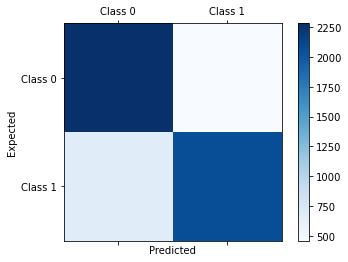

*****************Testing***************************


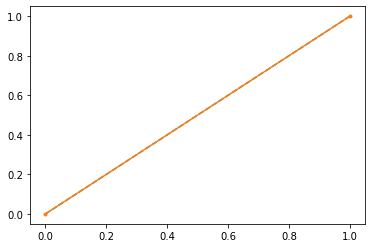

AUC: 0.500
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       913
           1       0.14      1.00      0.25       150

    accuracy                           0.14      1063
   macro avg       0.07      0.50      0.12      1063
weighted avg       0.02      0.14      0.03      1063


Accuracy 0.14111006585136407
Confusion matrix:
 [[  0 913]
 [  0 150]]


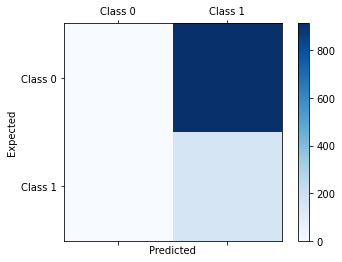

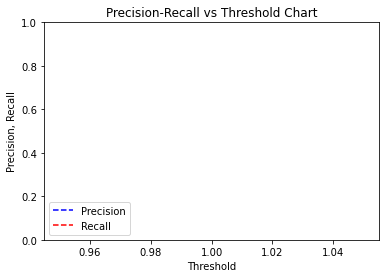

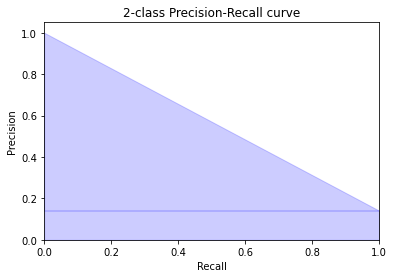

In [268]:
%time 
name = 'LogisticRegression'
X = {'train': X_train_scaled_SMOTE, 'test':X_test}
y = {'train': y_train_scaled_SMOTE, 'test':y_test}

grid = HyperTuning.grid_search(name, X_train_scaled_SMOTE, 
                                     y_train_scaled_SMOTE)
HyperTuning.evaluate_opt(grid, X, y)

## SVM

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.9min finished


Finished GridSearch
Best model

Pipeline(steps=[('clsfr',
                 SVC(C=0.1, class_weight='balanced', gamma=0.1,
                     probability=True, random_state=42))])


Best score on the validation: 0.863309657863897
    mean_test_score  rank_test_score                                    params
10         0.863310                1    {'clsfr__C': 0.1, 'clsfr__gamma': 0.1}
9          0.799694                2   {'clsfr__C': 0.1, 'clsfr__gamma': 0.01}
6          0.717039                3   {'clsfr__C': 0.01, 'clsfr__gamma': 0.1}
5          0.701239                4  {'clsfr__C': 0.01, 'clsfr__gamma': 0.01}
8          0.700861                5  {'clsfr__C': 0.1, 'clsfr__gamma': 0.001}
*******************Training************************
Best. score: 0.863309657863897
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      2739
           1       0.94      0.83      0.88      2739

    accuracy           

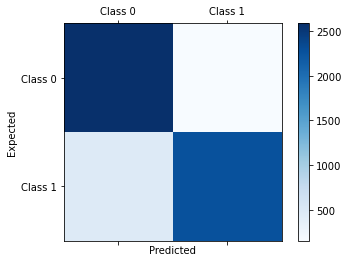

*****************Testing***************************


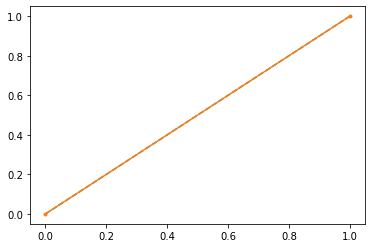

AUC: 0.500
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       913
           1       0.00      0.00      0.00       150

    accuracy                           0.86      1063
   macro avg       0.43      0.50      0.46      1063
weighted avg       0.74      0.86      0.79      1063


Accuracy 0.8588899341486359
Confusion matrix:
 [[913   0]
 [150   0]]


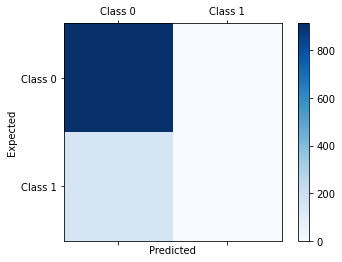

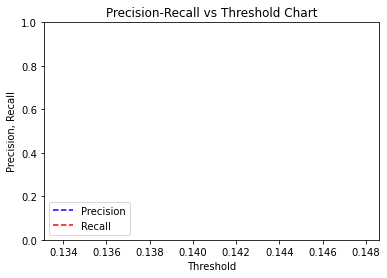

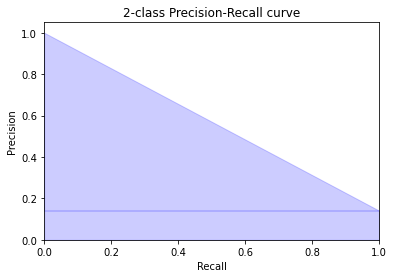

In [204]:
%time 
name = 'SVM'
X = {'train': X_train_scaled_SMOTE, 'test':X_test}
y = {'train': y_train_scaled_SMOTE, 'test':y_test}

grid = HyperTuning.grid_search(name, X_train_scaled_SMOTE, 
                                     y_train_scaled_SMOTE)
HyperTuning.evaluate_opt(grid, X, y)

## RandomForestClassifier

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 89.3min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 120.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 161.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 169.7min finished


Finished GridSearch
Best model

Pipeline(steps=[('clsfr',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        n_estimators=600, random_state=42))])


Best score on the validation: 0.9678687622876605
     mean_test_score  rank_test_score  \
496         0.967869                1   
451         0.967869                1   
450         0.967502                3   
495         0.967502                3   
453         0.967321                5   

                                                params  
496  {'clsfr__bootstrap': False, 'clsfr__max_depth'...  
451  {'clsfr__bootstrap': False, 'clsfr__max_depth'...  
450  {'clsfr__bootstrap': False, 'clsfr__max_depth'...  
495  {'clsfr__bootstrap': False, 'clsfr__max_depth'...  
453  {'clsfr__bootstrap': False, 'clsfr__max_depth'...  
*******************Training************************
Best. score: 0.9678687622876605
Classification Report: 
               precision    recall  f1-score 

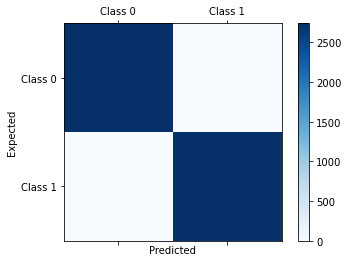

*****************Testing***************************


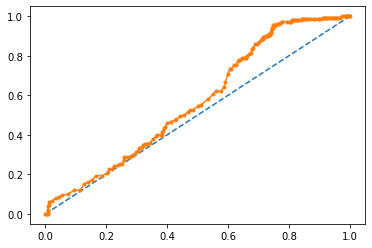

AUC: 0.569
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.27      0.42       913
           1       0.17      0.90      0.28       150

    accuracy                           0.36      1063
   macro avg       0.56      0.58      0.35      1063
weighted avg       0.83      0.36      0.40      1063


Accuracy 0.3584195672624647
Confusion matrix:
 [[246 667]
 [ 15 135]]


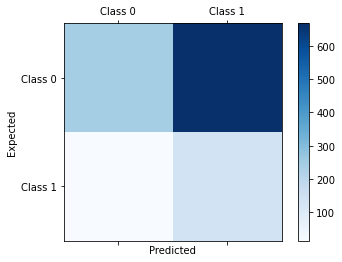

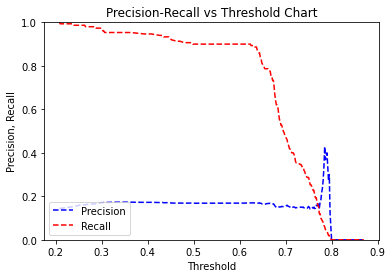

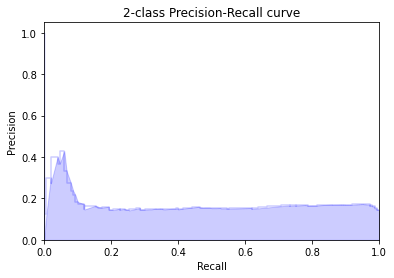

In [33]:
%time 
name = 'RandomForestClassifier'
X = {'train': X_train_scaled_SMOTE, 'test':X_test}
y = {'train': y_train_scaled_SMOTE, 'test':y_test}

grid = HyperTuning.grid_search(name, X_train_scaled_SMOTE, 
                                     y_train_scaled_SMOTE)
HyperTuning.evaluate_opt(grid, X, y)

## XGBoost

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 35.6min finished


Finished GridSearch
Best model

Pipeline(steps=[('clsfr',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1.0, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=1, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=2000,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1.0, tree_method='exact',
                               validate_parameters=1, verbosity=None))])


Best score on the validation: 0.9693290004805021
     mean_test_score  rank_test_score  \
130   

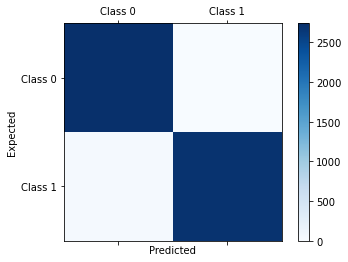

*****************Testing***************************


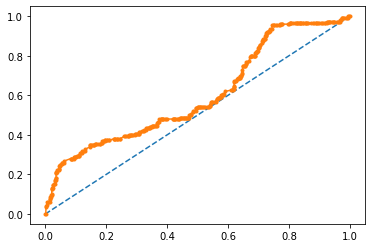

AUC: 0.603
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.15      0.26       913
           1       0.16      0.97      0.27       150

    accuracy                           0.27      1063
   macro avg       0.56      0.56      0.27      1063
weighted avg       0.85      0.27      0.26      1063


Accuracy 0.2671683913452493
Confusion matrix:
 [[139 774]
 [  5 145]]


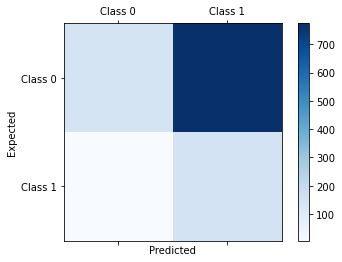

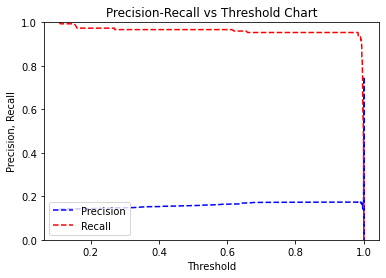

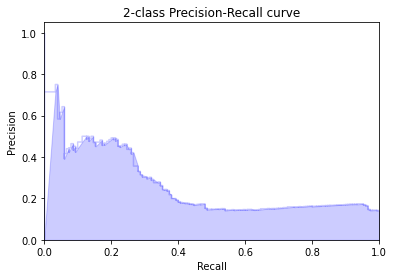

In [25]:
%time 
name = 'XGBoost'
X = {'train': X_train_scaled_SMOTE, 'test':X_test}
y = {'train': y_train_scaled_SMOTE, 'test':y_test}

grid = HyperTuning.grid_search(name, X_train_scaled_SMOTE, 
                                     y_train_scaled_SMOTE)
HyperTuning.evaluate_opt(grid, X, y)

## CatBoostClassifier

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 76.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 157.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 172.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 217.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 318.8min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 326.5min finished


0:	learn: 0.6629415	total: 70.1ms	remaining: 1m 45s
1:	learn: 0.6363551	total: 76.8ms	remaining: 57.6s
2:	learn: 0.6154157	total: 83.6ms	remaining: 41.7s
3:	learn: 0.5884878	total: 90.5ms	remaining: 33.8s
4:	learn: 0.5724923	total: 97.5ms	remaining: 29.2s
5:	learn: 0.5548376	total: 104ms	remaining: 25.9s
6:	learn: 0.5363867	total: 112ms	remaining: 23.9s
7:	learn: 0.5207929	total: 119ms	remaining: 22.2s
8:	learn: 0.5029741	total: 126ms	remaining: 20.8s
9:	learn: 0.4902200	total: 132ms	remaining: 19.7s
10:	learn: 0.4795213	total: 140ms	remaining: 18.9s
11:	learn: 0.4686788	total: 147ms	remaining: 18.2s
12:	learn: 0.4624068	total: 157ms	remaining: 18s
13:	learn: 0.4552672	total: 164ms	remaining: 17.4s
14:	learn: 0.4490483	total: 171ms	remaining: 17s
15:	learn: 0.4290540	total: 177ms	remaining: 16.4s
16:	learn: 0.4220028	total: 184ms	remaining: 16s
17:	learn: 0.4169049	total: 190ms	remaining: 15.7s
18:	learn: 0.4130880	total: 197ms	remaining: 15.4s
19:	learn: 0.4035143	total: 204ms	remaini

166:	learn: 0.1606256	total: 1.27s	remaining: 10.2s
167:	learn: 0.1597193	total: 1.28s	remaining: 10.2s
168:	learn: 0.1576898	total: 1.29s	remaining: 10.2s
169:	learn: 0.1572197	total: 1.3s	remaining: 10.2s
170:	learn: 0.1569681	total: 1.3s	remaining: 10.1s
171:	learn: 0.1562061	total: 1.31s	remaining: 10.1s
172:	learn: 0.1555840	total: 1.32s	remaining: 10.1s
173:	learn: 0.1552933	total: 1.33s	remaining: 10.1s
174:	learn: 0.1545950	total: 1.33s	remaining: 10.1s
175:	learn: 0.1540766	total: 1.34s	remaining: 10.1s
176:	learn: 0.1536550	total: 1.35s	remaining: 10.1s
177:	learn: 0.1531225	total: 1.35s	remaining: 10.1s
178:	learn: 0.1529296	total: 1.36s	remaining: 10s
179:	learn: 0.1525939	total: 1.37s	remaining: 10s
180:	learn: 0.1520198	total: 1.37s	remaining: 10s
181:	learn: 0.1505678	total: 1.38s	remaining: 10s
182:	learn: 0.1501417	total: 1.39s	remaining: 9.99s
183:	learn: 0.1479711	total: 1.39s	remaining: 9.97s
184:	learn: 0.1468527	total: 1.4s	remaining: 9.96s
185:	learn: 0.1463891	t

337:	learn: 0.0823531	total: 2.46s	remaining: 8.46s
338:	learn: 0.0822139	total: 2.47s	remaining: 8.45s
339:	learn: 0.0820808	total: 2.47s	remaining: 8.44s
340:	learn: 0.0819050	total: 2.48s	remaining: 8.43s
341:	learn: 0.0815730	total: 2.49s	remaining: 8.42s
342:	learn: 0.0814005	total: 2.49s	remaining: 8.41s
343:	learn: 0.0812779	total: 2.5s	remaining: 8.41s
344:	learn: 0.0810894	total: 2.51s	remaining: 8.4s
345:	learn: 0.0809602	total: 2.52s	remaining: 8.39s
346:	learn: 0.0807684	total: 2.52s	remaining: 8.38s
347:	learn: 0.0804839	total: 2.53s	remaining: 8.37s
348:	learn: 0.0803128	total: 2.54s	remaining: 8.36s
349:	learn: 0.0801802	total: 2.54s	remaining: 8.36s
350:	learn: 0.0800437	total: 2.55s	remaining: 8.35s
351:	learn: 0.0799565	total: 2.56s	remaining: 8.34s
352:	learn: 0.0798331	total: 2.56s	remaining: 8.33s
353:	learn: 0.0796717	total: 2.57s	remaining: 8.32s
354:	learn: 0.0793863	total: 2.58s	remaining: 8.31s
355:	learn: 0.0792485	total: 2.58s	remaining: 8.3s
356:	learn: 0.0

518:	learn: 0.0548316	total: 3.83s	remaining: 7.24s
519:	learn: 0.0547456	total: 3.84s	remaining: 7.25s
520:	learn: 0.0546279	total: 3.86s	remaining: 7.25s
521:	learn: 0.0545077	total: 3.87s	remaining: 7.24s
522:	learn: 0.0542950	total: 3.87s	remaining: 7.23s
523:	learn: 0.0542468	total: 3.88s	remaining: 7.22s
524:	learn: 0.0541229	total: 3.89s	remaining: 7.22s
525:	learn: 0.0540315	total: 3.89s	remaining: 7.21s
526:	learn: 0.0538944	total: 3.9s	remaining: 7.2s
527:	learn: 0.0538242	total: 3.91s	remaining: 7.19s
528:	learn: 0.0537152	total: 3.92s	remaining: 7.19s
529:	learn: 0.0535756	total: 3.92s	remaining: 7.18s
530:	learn: 0.0534958	total: 3.93s	remaining: 7.17s
531:	learn: 0.0533715	total: 3.94s	remaining: 7.16s
532:	learn: 0.0532872	total: 3.94s	remaining: 7.15s
533:	learn: 0.0532163	total: 3.95s	remaining: 7.14s
534:	learn: 0.0531454	total: 3.96s	remaining: 7.14s
535:	learn: 0.0529861	total: 3.96s	remaining: 7.13s
536:	learn: 0.0529223	total: 3.97s	remaining: 7.12s
537:	learn: 0.

699:	learn: 0.0397719	total: 5.23s	remaining: 5.98s
700:	learn: 0.0397195	total: 5.24s	remaining: 5.98s
701:	learn: 0.0396679	total: 5.26s	remaining: 5.98s
702:	learn: 0.0396175	total: 5.27s	remaining: 5.97s
703:	learn: 0.0395687	total: 5.28s	remaining: 5.97s
704:	learn: 0.0394855	total: 5.29s	remaining: 5.96s
705:	learn: 0.0394385	total: 5.29s	remaining: 5.95s
706:	learn: 0.0393380	total: 5.3s	remaining: 5.94s
707:	learn: 0.0392716	total: 5.31s	remaining: 5.93s
708:	learn: 0.0392467	total: 5.31s	remaining: 5.93s
709:	learn: 0.0391622	total: 5.32s	remaining: 5.92s
710:	learn: 0.0390527	total: 5.33s	remaining: 5.91s
711:	learn: 0.0390155	total: 5.33s	remaining: 5.9s
712:	learn: 0.0389708	total: 5.34s	remaining: 5.9s
713:	learn: 0.0389366	total: 5.35s	remaining: 5.89s
714:	learn: 0.0388827	total: 5.36s	remaining: 5.88s
715:	learn: 0.0388056	total: 5.36s	remaining: 5.87s
716:	learn: 0.0387404	total: 5.37s	remaining: 5.86s
717:	learn: 0.0386503	total: 5.38s	remaining: 5.86s
718:	learn: 0.0

879:	learn: 0.0297760	total: 6.62s	remaining: 4.66s
880:	learn: 0.0297123	total: 6.63s	remaining: 4.66s
881:	learn: 0.0296732	total: 6.65s	remaining: 4.66s
882:	learn: 0.0296381	total: 6.65s	remaining: 4.65s
883:	learn: 0.0295880	total: 6.66s	remaining: 4.64s
884:	learn: 0.0295364	total: 6.67s	remaining: 4.63s
885:	learn: 0.0294966	total: 6.67s	remaining: 4.63s
886:	learn: 0.0294716	total: 6.68s	remaining: 4.62s
887:	learn: 0.0294387	total: 6.69s	remaining: 4.61s
888:	learn: 0.0294101	total: 6.7s	remaining: 4.6s
889:	learn: 0.0293798	total: 6.7s	remaining: 4.59s
890:	learn: 0.0293350	total: 6.71s	remaining: 4.59s
891:	learn: 0.0293069	total: 6.72s	remaining: 4.58s
892:	learn: 0.0292777	total: 6.72s	remaining: 4.57s
893:	learn: 0.0292050	total: 6.73s	remaining: 4.56s
894:	learn: 0.0291760	total: 6.74s	remaining: 4.55s
895:	learn: 0.0291214	total: 6.75s	remaining: 4.55s
896:	learn: 0.0290909	total: 6.75s	remaining: 4.54s
897:	learn: 0.0290043	total: 6.76s	remaining: 4.53s
898:	learn: 0.0

1061:	learn: 0.0231995	total: 8.02s	remaining: 3.31s
1062:	learn: 0.0231601	total: 8.03s	remaining: 3.3s
1063:	learn: 0.0231363	total: 8.03s	remaining: 3.29s
1064:	learn: 0.0231064	total: 8.04s	remaining: 3.28s
1065:	learn: 0.0230788	total: 8.05s	remaining: 3.28s
1066:	learn: 0.0230185	total: 8.05s	remaining: 3.27s
1067:	learn: 0.0229872	total: 8.06s	remaining: 3.26s
1068:	learn: 0.0229670	total: 8.07s	remaining: 3.25s
1069:	learn: 0.0229500	total: 8.08s	remaining: 3.25s
1070:	learn: 0.0229176	total: 8.08s	remaining: 3.24s
1071:	learn: 0.0228827	total: 8.09s	remaining: 3.23s
1072:	learn: 0.0228387	total: 8.1s	remaining: 3.22s
1073:	learn: 0.0228109	total: 8.1s	remaining: 3.21s
1074:	learn: 0.0227819	total: 8.11s	remaining: 3.21s
1075:	learn: 0.0227556	total: 8.12s	remaining: 3.2s
1076:	learn: 0.0227334	total: 8.13s	remaining: 3.19s
1077:	learn: 0.0227139	total: 8.13s	remaining: 3.18s
1078:	learn: 0.0226925	total: 8.14s	remaining: 3.18s
1079:	learn: 0.0226646	total: 8.15s	remaining: 3.1

1225:	learn: 0.0187540	total: 9.2s	remaining: 2.06s
1226:	learn: 0.0187408	total: 9.21s	remaining: 2.05s
1227:	learn: 0.0187270	total: 9.22s	remaining: 2.04s
1228:	learn: 0.0186962	total: 9.22s	remaining: 2.03s
1229:	learn: 0.0186804	total: 9.23s	remaining: 2.03s
1230:	learn: 0.0186601	total: 9.24s	remaining: 2.02s
1231:	learn: 0.0186344	total: 9.25s	remaining: 2.01s
1232:	learn: 0.0186200	total: 9.26s	remaining: 2s
1233:	learn: 0.0186025	total: 9.26s	remaining: 2s
1234:	learn: 0.0185893	total: 9.27s	remaining: 1.99s
1235:	learn: 0.0185723	total: 9.28s	remaining: 1.98s
1236:	learn: 0.0185541	total: 9.28s	remaining: 1.97s
1237:	learn: 0.0185274	total: 9.29s	remaining: 1.97s
1238:	learn: 0.0185022	total: 9.3s	remaining: 1.96s
1239:	learn: 0.0184872	total: 9.3s	remaining: 1.95s
1240:	learn: 0.0184662	total: 9.31s	remaining: 1.94s
1241:	learn: 0.0184410	total: 9.32s	remaining: 1.94s
1242:	learn: 0.0184116	total: 9.32s	remaining: 1.93s
1243:	learn: 0.0183969	total: 9.33s	remaining: 1.92s
12

1389:	learn: 0.0156976	total: 10.4s	remaining: 822ms
1390:	learn: 0.0156605	total: 10.4s	remaining: 814ms
1391:	learn: 0.0156522	total: 10.4s	remaining: 807ms
1392:	learn: 0.0156206	total: 10.4s	remaining: 799ms
1393:	learn: 0.0156060	total: 10.4s	remaining: 792ms
1394:	learn: 0.0155966	total: 10.4s	remaining: 785ms
1395:	learn: 0.0155898	total: 10.4s	remaining: 777ms
1396:	learn: 0.0155642	total: 10.4s	remaining: 770ms
1397:	learn: 0.0155518	total: 10.4s	remaining: 762ms
1398:	learn: 0.0155249	total: 10.5s	remaining: 755ms
1399:	learn: 0.0155097	total: 10.5s	remaining: 747ms
1400:	learn: 0.0154952	total: 10.5s	remaining: 740ms
1401:	learn: 0.0154853	total: 10.5s	remaining: 732ms
1402:	learn: 0.0154555	total: 10.5s	remaining: 725ms
1403:	learn: 0.0154458	total: 10.5s	remaining: 717ms
1404:	learn: 0.0154362	total: 10.5s	remaining: 710ms
1405:	learn: 0.0154250	total: 10.5s	remaining: 702ms
1406:	learn: 0.0153936	total: 10.5s	remaining: 695ms
1407:	learn: 0.0153799	total: 10.5s	remaining:

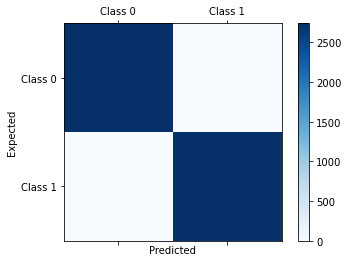

*****************Testing***************************


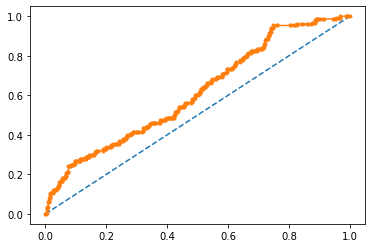

AUC: 0.614
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.21      0.34       913
           1       0.17      0.95      0.28       150

    accuracy                           0.31      1063
   macro avg       0.56      0.58      0.31      1063
weighted avg       0.85      0.31      0.33      1063


Accuracy 0.31326434619002824
Confusion matrix:
 [[190 723]
 [  7 143]]


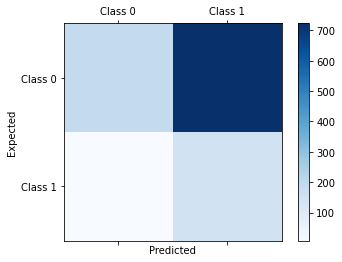

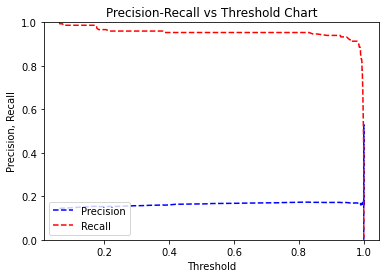

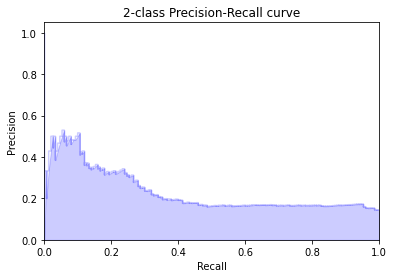

In [32]:
%time 
name = 'CatBoostClassifier'
X = {'train': X_train_scaled_SMOTE, 'test':X_test}
y = {'train': y_train_scaled_SMOTE, 'test':y_test}

grid = HyperTuning.grid_search(name, X_train_scaled_SMOTE, 
                                     y_train_scaled_SMOTE)
HyperTuning.evaluate_opt(grid, X, y)

In [ ]:
X_train_sampled_SMOTE, y_train_sampled_SMOTE = sampler.sampling(X_train, y_train)
X_test_sampled_SMOTE, y_test_sampled_SMOTE = sampler.sampling(X_test, y_test)

X_train_scaled_SMOTE, y_train_scaled_SMOTE = sampler.sampling(X_train_scaled, y_train)
X_test_scaled_SMOTE, y_test_scaled_SMOTE = sampler.sampling(X_test_scaled, y_test)



## Split your data into train and validation

In [226]:
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train_smote,y_train_smote = sm.fit_resample(X, y)


KeyError: 0

binary classification:Logloss

probabilities in target : CrossEntropy

In [227]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    #cat_features=Categorical
    eval_set=(X_test, y_test),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [228]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
     verbose=10,
)
model.fit(
    X_train, y_train,
    
    eval_set=(X_test, y_test),
)

Learning rate set to 0.11488
0:	learn: 0.5705918	test: 0.5744810	best: 0.5744810 (0)	total: 12.6ms	remaining: 1.25s
10:	learn: 0.2265255	test: 0.2485871	best: 0.2485871 (10)	total: 74.2ms	remaining: 601ms
20:	learn: 0.1605399	test: 0.1941567	best: 0.1941567 (20)	total: 119ms	remaining: 447ms
30:	learn: 0.1362979	test: 0.1756714	best: 0.1756714 (30)	total: 166ms	remaining: 369ms
40:	learn: 0.1257186	test: 0.1708120	best: 0.1707080 (38)	total: 236ms	remaining: 340ms
50:	learn: 0.1171431	test: 0.1664708	best: 0.1664388 (49)	total: 286ms	remaining: 274ms
60:	learn: 0.1101438	test: 0.1628130	best: 0.1628130 (60)	total: 331ms	remaining: 211ms
70:	learn: 0.1053863	test: 0.1631979	best: 0.1628130 (60)	total: 374ms	remaining: 153ms
80:	learn: 0.0994026	test: 0.1616772	best: 0.1616095 (76)	total: 419ms	remaining: 98.3ms
90:	learn: 0.0937221	test: 0.1617675	best: 0.1616095 (76)	total: 489ms	remaining: 48.3ms
99:	learn: 0.0908666	test: 0.1619510	best: 0.1616095 (76)	total: 531ms	remaining: 0us

be

## Metrics calculation and graph plotting for traing data

In [229]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [230]:
## Model Comparision

In [231]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    #cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    #cat_features=cat_features,
    verbose=False
)

In [232]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Best Iteration

In [233]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=400,
    random_seed=63,
    learning_rate=0.5,
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [234]:
# Applying kfold crossvalidation for Catboost

In [235]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))



0:	learn: 0.3059734	total: 20.4ms	remaining: 8.16s
1:	learn: 0.2520939	total: 28.4ms	remaining: 5.64s
2:	learn: 0.2010546	total: 34.6ms	remaining: 4.58s
3:	learn: 0.1781352	total: 41.3ms	remaining: 4.08s
4:	learn: 0.1664197	total: 46.5ms	remaining: 3.67s
5:	learn: 0.1473450	total: 51.1ms	remaining: 3.35s
6:	learn: 0.1356541	total: 55.5ms	remaining: 3.11s
7:	learn: 0.1318788	total: 60.2ms	remaining: 2.95s
8:	learn: 0.1271688	total: 64.5ms	remaining: 2.8s
9:	learn: 0.1223345	total: 69ms	remaining: 2.69s
10:	learn: 0.1197677	total: 74.1ms	remaining: 2.62s
11:	learn: 0.1149261	total: 78.9ms	remaining: 2.55s
12:	learn: 0.1114607	total: 83.2ms	remaining: 2.48s
13:	learn: 0.1089488	total: 87.7ms	remaining: 2.42s
14:	learn: 0.1067842	total: 92.1ms	remaining: 2.36s
15:	learn: 0.1046199	total: 96.5ms	remaining: 2.32s
16:	learn: 0.1026311	total: 101ms	remaining: 2.27s
17:	learn: 0.0997809	total: 105ms	remaining: 2.23s
18:	learn: 0.0976448	total: 109ms	remaining: 2.19s
19:	learn: 0.0961959	total: 

177:	learn: 0.0081660	total: 1.17s	remaining: 1.46s
178:	learn: 0.0080636	total: 1.19s	remaining: 1.47s
179:	learn: 0.0080200	total: 1.19s	remaining: 1.46s
180:	learn: 0.0079701	total: 1.2s	remaining: 1.46s
181:	learn: 0.0079088	total: 1.21s	remaining: 1.45s
182:	learn: 0.0078859	total: 1.22s	remaining: 1.44s
183:	learn: 0.0078564	total: 1.22s	remaining: 1.44s
184:	learn: 0.0078198	total: 1.23s	remaining: 1.43s
185:	learn: 0.0077681	total: 1.23s	remaining: 1.42s
186:	learn: 0.0077178	total: 1.24s	remaining: 1.41s
187:	learn: 0.0075726	total: 1.24s	remaining: 1.4s
188:	learn: 0.0075077	total: 1.25s	remaining: 1.39s
189:	learn: 0.0074497	total: 1.25s	remaining: 1.38s
190:	learn: 0.0073448	total: 1.26s	remaining: 1.38s
191:	learn: 0.0073175	total: 1.26s	remaining: 1.37s
192:	learn: 0.0073030	total: 1.27s	remaining: 1.36s
193:	learn: 0.0072024	total: 1.27s	remaining: 1.35s
194:	learn: 0.0071286	total: 1.27s	remaining: 1.34s
195:	learn: 0.0070762	total: 1.28s	remaining: 1.33s
196:	learn: 0.

362:	learn: 0.0030277	total: 2.14s	remaining: 218ms
363:	learn: 0.0029987	total: 2.15s	remaining: 212ms
364:	learn: 0.0029888	total: 2.16s	remaining: 207ms
365:	learn: 0.0029818	total: 2.17s	remaining: 202ms
366:	learn: 0.0029562	total: 2.18s	remaining: 196ms
367:	learn: 0.0029369	total: 2.19s	remaining: 190ms
368:	learn: 0.0029343	total: 2.2s	remaining: 185ms
369:	learn: 0.0029320	total: 2.2s	remaining: 178ms
370:	learn: 0.0029320	total: 2.21s	remaining: 172ms
371:	learn: 0.0029213	total: 2.21s	remaining: 167ms
372:	learn: 0.0029213	total: 2.23s	remaining: 161ms
373:	learn: 0.0029213	total: 2.24s	remaining: 156ms
374:	learn: 0.0029213	total: 2.25s	remaining: 150ms
375:	learn: 0.0028928	total: 2.26s	remaining: 144ms
376:	learn: 0.0028927	total: 2.27s	remaining: 138ms
377:	learn: 0.0028927	total: 2.27s	remaining: 132ms
378:	learn: 0.0028927	total: 2.28s	remaining: 126ms
379:	learn: 0.0028926	total: 2.29s	remaining: 120ms
380:	learn: 0.0028839	total: 2.29s	remaining: 114ms
381:	learn: 0.

147:	learn: 0.0105285	total: 872ms	remaining: 1.48s
148:	learn: 0.0104565	total: 886ms	remaining: 1.49s
149:	learn: 0.0103913	total: 896ms	remaining: 1.49s
150:	learn: 0.0103508	total: 907ms	remaining: 1.5s
151:	learn: 0.0102770	total: 922ms	remaining: 1.5s
152:	learn: 0.0101986	total: 932ms	remaining: 1.5s
153:	learn: 0.0101607	total: 947ms	remaining: 1.51s
154:	learn: 0.0101339	total: 965ms	remaining: 1.52s
155:	learn: 0.0100465	total: 973ms	remaining: 1.52s
156:	learn: 0.0099975	total: 983ms	remaining: 1.52s
157:	learn: 0.0099365	total: 990ms	remaining: 1.51s
158:	learn: 0.0098516	total: 999ms	remaining: 1.51s
159:	learn: 0.0096649	total: 1s	remaining: 1.51s
160:	learn: 0.0095344	total: 1.01s	remaining: 1.5s
161:	learn: 0.0094625	total: 1.02s	remaining: 1.5s
162:	learn: 0.0093427	total: 1.02s	remaining: 1.49s
163:	learn: 0.0092397	total: 1.03s	remaining: 1.48s
164:	learn: 0.0091821	total: 1.03s	remaining: 1.48s
165:	learn: 0.0091239	total: 1.04s	remaining: 1.47s
166:	learn: 0.009078

320:	learn: 0.0035080	total: 2.08s	remaining: 513ms
321:	learn: 0.0035080	total: 2.09s	remaining: 507ms
322:	learn: 0.0035007	total: 2.11s	remaining: 503ms
323:	learn: 0.0035007	total: 2.12s	remaining: 497ms
324:	learn: 0.0034815	total: 2.13s	remaining: 491ms
325:	learn: 0.0034720	total: 2.13s	remaining: 484ms
326:	learn: 0.0034549	total: 2.14s	remaining: 477ms
327:	learn: 0.0034035	total: 2.14s	remaining: 470ms
328:	learn: 0.0034035	total: 2.15s	remaining: 464ms
329:	learn: 0.0033995	total: 2.16s	remaining: 458ms
330:	learn: 0.0033994	total: 2.16s	remaining: 451ms
331:	learn: 0.0033807	total: 2.17s	remaining: 444ms
332:	learn: 0.0033767	total: 2.17s	remaining: 438ms
333:	learn: 0.0033398	total: 2.18s	remaining: 431ms
334:	learn: 0.0033353	total: 2.19s	remaining: 425ms
335:	learn: 0.0033353	total: 2.19s	remaining: 418ms
336:	learn: 0.0033263	total: 2.2s	remaining: 411ms
337:	learn: 0.0033066	total: 2.21s	remaining: 405ms
338:	learn: 0.0032992	total: 2.21s	remaining: 398ms
339:	learn: 0

95:	learn: 0.0201208	total: 819ms	remaining: 2.59s
96:	learn: 0.0197755	total: 844ms	remaining: 2.64s
97:	learn: 0.0193698	total: 870ms	remaining: 2.68s
98:	learn: 0.0191729	total: 882ms	remaining: 2.68s
99:	learn: 0.0190050	total: 894ms	remaining: 2.68s
100:	learn: 0.0187944	total: 901ms	remaining: 2.67s
101:	learn: 0.0186051	total: 922ms	remaining: 2.69s
102:	learn: 0.0181095	total: 930ms	remaining: 2.68s
103:	learn: 0.0176989	total: 950ms	remaining: 2.7s
104:	learn: 0.0175650	total: 957ms	remaining: 2.69s
105:	learn: 0.0174068	total: 962ms	remaining: 2.67s
106:	learn: 0.0172773	total: 968ms	remaining: 2.65s
107:	learn: 0.0167847	total: 974ms	remaining: 2.63s
108:	learn: 0.0164841	total: 981ms	remaining: 2.62s
109:	learn: 0.0162487	total: 986ms	remaining: 2.6s
110:	learn: 0.0161482	total: 990ms	remaining: 2.58s
111:	learn: 0.0157907	total: 995ms	remaining: 2.56s
112:	learn: 0.0156465	total: 1s	remaining: 2.55s
113:	learn: 0.0154959	total: 1.01s	remaining: 2.54s
114:	learn: 0.0153794	

263:	learn: 0.0040988	total: 1.76s	remaining: 908ms
264:	learn: 0.0040375	total: 1.77s	remaining: 902ms
265:	learn: 0.0039755	total: 1.78s	remaining: 896ms
266:	learn: 0.0039357	total: 1.79s	remaining: 890ms
267:	learn: 0.0039027	total: 1.79s	remaining: 883ms
268:	learn: 0.0038870	total: 1.8s	remaining: 875ms
269:	learn: 0.0038228	total: 1.8s	remaining: 867ms
270:	learn: 0.0038173	total: 1.8s	remaining: 859ms
271:	learn: 0.0038172	total: 1.81s	remaining: 852ms
272:	learn: 0.0038000	total: 1.81s	remaining: 844ms
273:	learn: 0.0037945	total: 1.82s	remaining: 837ms
274:	learn: 0.0037687	total: 1.82s	remaining: 829ms
275:	learn: 0.0037612	total: 1.83s	remaining: 822ms
276:	learn: 0.0037610	total: 1.83s	remaining: 814ms
277:	learn: 0.0037477	total: 1.84s	remaining: 806ms
278:	learn: 0.0037477	total: 1.84s	remaining: 799ms
279:	learn: 0.0037393	total: 1.84s	remaining: 791ms
280:	learn: 0.0036895	total: 1.85s	remaining: 783ms
281:	learn: 0.0036405	total: 1.85s	remaining: 776ms
282:	learn: 0.0

32:	learn: 0.0640943	total: 207ms	remaining: 2.3s
33:	learn: 0.0620734	total: 237ms	remaining: 2.54s
34:	learn: 0.0609091	total: 255ms	remaining: 2.65s
35:	learn: 0.0583989	total: 266ms	remaining: 2.69s
36:	learn: 0.0574935	total: 288ms	remaining: 2.83s
37:	learn: 0.0559173	total: 308ms	remaining: 2.93s
38:	learn: 0.0550410	total: 315ms	remaining: 2.92s
39:	learn: 0.0539090	total: 322ms	remaining: 2.9s
40:	learn: 0.0532710	total: 327ms	remaining: 2.87s
41:	learn: 0.0518154	total: 333ms	remaining: 2.84s
42:	learn: 0.0510580	total: 338ms	remaining: 2.8s
43:	learn: 0.0500456	total: 342ms	remaining: 2.77s
44:	learn: 0.0487974	total: 347ms	remaining: 2.74s
45:	learn: 0.0476280	total: 352ms	remaining: 2.71s
46:	learn: 0.0464396	total: 356ms	remaining: 2.67s
47:	learn: 0.0455389	total: 361ms	remaining: 2.64s
48:	learn: 0.0450606	total: 365ms	remaining: 2.61s
49:	learn: 0.0436873	total: 369ms	remaining: 2.58s
50:	learn: 0.0424855	total: 374ms	remaining: 2.56s
51:	learn: 0.0411758	total: 378ms	

221:	learn: 0.0052093	total: 1.41s	remaining: 1.13s
222:	learn: 0.0051908	total: 1.42s	remaining: 1.12s
223:	learn: 0.0051324	total: 1.43s	remaining: 1.12s
224:	learn: 0.0051122	total: 1.43s	remaining: 1.11s
225:	learn: 0.0050506	total: 1.44s	remaining: 1.11s
226:	learn: 0.0050425	total: 1.44s	remaining: 1.1s
227:	learn: 0.0049815	total: 1.45s	remaining: 1.09s
228:	learn: 0.0049778	total: 1.45s	remaining: 1.08s
229:	learn: 0.0048711	total: 1.45s	remaining: 1.07s
230:	learn: 0.0048588	total: 1.46s	remaining: 1.07s
231:	learn: 0.0047971	total: 1.46s	remaining: 1.06s
232:	learn: 0.0047792	total: 1.47s	remaining: 1.05s
233:	learn: 0.0047472	total: 1.47s	remaining: 1.04s
234:	learn: 0.0047300	total: 1.48s	remaining: 1.04s
235:	learn: 0.0047134	total: 1.48s	remaining: 1.03s
236:	learn: 0.0046977	total: 1.49s	remaining: 1.02s
237:	learn: 0.0046811	total: 1.49s	remaining: 1.01s
238:	learn: 0.0046713	total: 1.5s	remaining: 1.01s
239:	learn: 0.0046712	total: 1.5s	remaining: 1s
240:	learn: 0.0046

0:	learn: 0.2885439	total: 4.26ms	remaining: 1.7s
1:	learn: 0.2396172	total: 9.05ms	remaining: 1.8s
2:	learn: 0.1851121	total: 13.4ms	remaining: 1.77s
3:	learn: 0.1694868	total: 17.8ms	remaining: 1.77s
4:	learn: 0.1499124	total: 22.5ms	remaining: 1.77s
5:	learn: 0.1434488	total: 26.9ms	remaining: 1.76s
6:	learn: 0.1317013	total: 31.3ms	remaining: 1.76s
7:	learn: 0.1272395	total: 35.8ms	remaining: 1.75s
8:	learn: 0.1222788	total: 40.7ms	remaining: 1.77s
9:	learn: 0.1171928	total: 46.4ms	remaining: 1.81s
10:	learn: 0.1157202	total: 51ms	remaining: 1.8s
11:	learn: 0.1088182	total: 55.3ms	remaining: 1.79s
12:	learn: 0.1073437	total: 59.6ms	remaining: 1.77s
13:	learn: 0.1025684	total: 64ms	remaining: 1.76s
14:	learn: 0.0995011	total: 69.6ms	remaining: 1.79s
15:	learn: 0.0972179	total: 74ms	remaining: 1.77s
16:	learn: 0.0932585	total: 78.5ms	remaining: 1.77s
17:	learn: 0.0918729	total: 83ms	remaining: 1.76s
18:	learn: 0.0896577	total: 87.5ms	remaining: 1.75s
19:	learn: 0.0864606	total: 92ms	

176:	learn: 0.0059784	total: 966ms	remaining: 1.22s
177:	learn: 0.0059492	total: 973ms	remaining: 1.21s
178:	learn: 0.0059220	total: 981ms	remaining: 1.21s
179:	learn: 0.0059016	total: 989ms	remaining: 1.21s
180:	learn: 0.0058683	total: 994ms	remaining: 1.2s
181:	learn: 0.0058485	total: 998ms	remaining: 1.2s
182:	learn: 0.0057637	total: 1s	remaining: 1.19s
183:	learn: 0.0056863	total: 1.01s	remaining: 1.18s
184:	learn: 0.0056542	total: 1.01s	remaining: 1.18s
185:	learn: 0.0055216	total: 1.02s	remaining: 1.17s
186:	learn: 0.0054569	total: 1.02s	remaining: 1.16s
187:	learn: 0.0054334	total: 1.02s	remaining: 1.16s
188:	learn: 0.0053201	total: 1.03s	remaining: 1.15s
189:	learn: 0.0052989	total: 1.03s	remaining: 1.14s
190:	learn: 0.0052714	total: 1.04s	remaining: 1.14s
191:	learn: 0.0052229	total: 1.04s	remaining: 1.13s
192:	learn: 0.0052229	total: 1.05s	remaining: 1.12s
193:	learn: 0.0051666	total: 1.05s	remaining: 1.12s
194:	learn: 0.0050696	total: 1.06s	remaining: 1.11s
195:	learn: 0.005

338:	learn: 0.0026418	total: 1.73s	remaining: 311ms
339:	learn: 0.0026180	total: 1.74s	remaining: 306ms
340:	learn: 0.0025970	total: 1.74s	remaining: 302ms
341:	learn: 0.0025937	total: 1.75s	remaining: 297ms
342:	learn: 0.0025901	total: 1.76s	remaining: 292ms
343:	learn: 0.0025900	total: 1.76s	remaining: 287ms
344:	learn: 0.0025900	total: 1.76s	remaining: 281ms
345:	learn: 0.0025786	total: 1.77s	remaining: 276ms
346:	learn: 0.0025633	total: 1.77s	remaining: 271ms
347:	learn: 0.0025632	total: 1.78s	remaining: 266ms
348:	learn: 0.0025632	total: 1.78s	remaining: 260ms
349:	learn: 0.0025632	total: 1.79s	remaining: 255ms
350:	learn: 0.0025632	total: 1.79s	remaining: 250ms
351:	learn: 0.0025216	total: 1.79s	remaining: 245ms
352:	learn: 0.0025215	total: 1.8s	remaining: 240ms
353:	learn: 0.0025214	total: 1.8s	remaining: 234ms
354:	learn: 0.0025214	total: 1.81s	remaining: 229ms
355:	learn: 0.0025214	total: 1.81s	remaining: 224ms
356:	learn: 0.0025214	total: 1.82s	remaining: 219ms
357:	learn: 0.

110:	learn: 0.0162378	total: 655ms	remaining: 1.71s
111:	learn: 0.0160027	total: 672ms	remaining: 1.73s
112:	learn: 0.0158700	total: 680ms	remaining: 1.73s
113:	learn: 0.0154956	total: 685ms	remaining: 1.72s
114:	learn: 0.0153154	total: 689ms	remaining: 1.71s
115:	learn: 0.0151736	total: 694ms	remaining: 1.7s
116:	learn: 0.0149915	total: 698ms	remaining: 1.69s
117:	learn: 0.0147680	total: 703ms	remaining: 1.68s
118:	learn: 0.0146259	total: 707ms	remaining: 1.67s
119:	learn: 0.0145815	total: 712ms	remaining: 1.66s
120:	learn: 0.0145052	total: 717ms	remaining: 1.65s
121:	learn: 0.0143803	total: 723ms	remaining: 1.65s
122:	learn: 0.0143484	total: 730ms	remaining: 1.64s
123:	learn: 0.0142483	total: 734ms	remaining: 1.63s
124:	learn: 0.0141622	total: 739ms	remaining: 1.62s
125:	learn: 0.0140355	total: 745ms	remaining: 1.62s
126:	learn: 0.0138726	total: 750ms	remaining: 1.61s
127:	learn: 0.0137436	total: 755ms	remaining: 1.6s
128:	learn: 0.0135137	total: 759ms	remaining: 1.59s
129:	learn: 0.

282:	learn: 0.0041841	total: 1.82s	remaining: 753ms
283:	learn: 0.0041841	total: 1.83s	remaining: 747ms
284:	learn: 0.0041684	total: 1.84s	remaining: 742ms
285:	learn: 0.0041595	total: 1.85s	remaining: 736ms
286:	learn: 0.0041595	total: 1.85s	remaining: 729ms
287:	learn: 0.0041155	total: 1.85s	remaining: 721ms
288:	learn: 0.0041014	total: 1.86s	remaining: 714ms
289:	learn: 0.0040985	total: 1.86s	remaining: 707ms
290:	learn: 0.0040884	total: 1.87s	remaining: 700ms
291:	learn: 0.0040778	total: 1.87s	remaining: 693ms
292:	learn: 0.0040486	total: 1.88s	remaining: 686ms
293:	learn: 0.0040401	total: 1.89s	remaining: 680ms
294:	learn: 0.0040388	total: 1.9s	remaining: 676ms
295:	learn: 0.0040315	total: 1.91s	remaining: 670ms
296:	learn: 0.0040082	total: 1.91s	remaining: 664ms
297:	learn: 0.0039607	total: 1.92s	remaining: 658ms
298:	learn: 0.0039507	total: 1.93s	remaining: 653ms
299:	learn: 0.0039375	total: 1.94s	remaining: 647ms
300:	learn: 0.0039244	total: 1.95s	remaining: 641ms
301:	learn: 0

41:	learn: 0.0566748	total: 191ms	remaining: 1.63s
42:	learn: 0.0564871	total: 199ms	remaining: 1.65s
43:	learn: 0.0560732	total: 206ms	remaining: 1.67s
44:	learn: 0.0557324	total: 214ms	remaining: 1.69s
45:	learn: 0.0536538	total: 221ms	remaining: 1.7s
46:	learn: 0.0526408	total: 225ms	remaining: 1.69s
47:	learn: 0.0515625	total: 229ms	remaining: 1.68s
48:	learn: 0.0500542	total: 234ms	remaining: 1.67s
49:	learn: 0.0493481	total: 238ms	remaining: 1.67s
50:	learn: 0.0484800	total: 243ms	remaining: 1.66s
51:	learn: 0.0476854	total: 247ms	remaining: 1.66s
52:	learn: 0.0469895	total: 252ms	remaining: 1.65s
53:	learn: 0.0466548	total: 256ms	remaining: 1.64s
54:	learn: 0.0458477	total: 260ms	remaining: 1.63s
55:	learn: 0.0449894	total: 265ms	remaining: 1.63s
56:	learn: 0.0444289	total: 270ms	remaining: 1.62s
57:	learn: 0.0432663	total: 275ms	remaining: 1.62s
58:	learn: 0.0422739	total: 279ms	remaining: 1.61s
59:	learn: 0.0415682	total: 283ms	remaining: 1.6s
60:	learn: 0.0411616	total: 288ms

238:	learn: 0.0056416	total: 1.15s	remaining: 775ms
239:	learn: 0.0055906	total: 1.18s	remaining: 789ms
240:	learn: 0.0055540	total: 1.19s	remaining: 785ms
241:	learn: 0.0055234	total: 1.2s	remaining: 781ms
242:	learn: 0.0055234	total: 1.2s	remaining: 776ms
243:	learn: 0.0054586	total: 1.21s	remaining: 772ms
244:	learn: 0.0054425	total: 1.21s	remaining: 768ms
245:	learn: 0.0054261	total: 1.22s	remaining: 764ms
246:	learn: 0.0054133	total: 1.23s	remaining: 759ms
247:	learn: 0.0053939	total: 1.23s	remaining: 755ms
248:	learn: 0.0053939	total: 1.24s	remaining: 751ms
249:	learn: 0.0053889	total: 1.24s	remaining: 747ms
250:	learn: 0.0053415	total: 1.25s	remaining: 742ms
251:	learn: 0.0052213	total: 1.26s	remaining: 738ms
252:	learn: 0.0052015	total: 1.26s	remaining: 734ms
253:	learn: 0.0051267	total: 1.27s	remaining: 729ms
254:	learn: 0.0050902	total: 1.27s	remaining: 725ms
255:	learn: 0.0050794	total: 1.28s	remaining: 721ms
256:	learn: 0.0050700	total: 1.29s	remaining: 716ms
257:	learn: 0.

4:	learn: 0.1651395	total: 22.6ms	remaining: 1.78s
5:	learn: 0.1496874	total: 30ms	remaining: 1.97s
6:	learn: 0.1401044	total: 37.9ms	remaining: 2.13s
7:	learn: 0.1379206	total: 45.7ms	remaining: 2.24s
8:	learn: 0.1272946	total: 52.3ms	remaining: 2.27s
9:	learn: 0.1224642	total: 56.7ms	remaining: 2.21s
10:	learn: 0.1217807	total: 61ms	remaining: 2.16s
11:	learn: 0.1169809	total: 65.5ms	remaining: 2.12s
12:	learn: 0.1116248	total: 69.9ms	remaining: 2.08s
13:	learn: 0.1079146	total: 74.3ms	remaining: 2.05s
14:	learn: 0.1063098	total: 78.8ms	remaining: 2.02s
15:	learn: 0.1027560	total: 83.2ms	remaining: 2s
16:	learn: 0.1002829	total: 88.3ms	remaining: 1.99s
17:	learn: 0.0974238	total: 92.7ms	remaining: 1.97s
18:	learn: 0.0962117	total: 98.2ms	remaining: 1.97s
19:	learn: 0.0941155	total: 103ms	remaining: 1.95s
20:	learn: 0.0903850	total: 107ms	remaining: 1.93s
21:	learn: 0.0876850	total: 115ms	remaining: 1.97s
22:	learn: 0.0846936	total: 123ms	remaining: 2.01s
23:	learn: 0.0830165	total: 1

185:	learn: 0.0056734	total: 1.01s	remaining: 1.17s
186:	learn: 0.0056271	total: 1.03s	remaining: 1.17s
187:	learn: 0.0055956	total: 1.05s	remaining: 1.18s
188:	learn: 0.0055730	total: 1.06s	remaining: 1.18s
189:	learn: 0.0055501	total: 1.07s	remaining: 1.18s
190:	learn: 0.0054955	total: 1.08s	remaining: 1.18s
191:	learn: 0.0054282	total: 1.09s	remaining: 1.18s
192:	learn: 0.0054125	total: 1.09s	remaining: 1.17s
193:	learn: 0.0054049	total: 1.1s	remaining: 1.16s
194:	learn: 0.0053859	total: 1.1s	remaining: 1.16s
195:	learn: 0.0053574	total: 1.1s	remaining: 1.15s
196:	learn: 0.0053412	total: 1.11s	remaining: 1.14s
197:	learn: 0.0053064	total: 1.11s	remaining: 1.14s
198:	learn: 0.0052659	total: 1.12s	remaining: 1.13s
199:	learn: 0.0052208	total: 1.12s	remaining: 1.12s
200:	learn: 0.0052069	total: 1.13s	remaining: 1.12s
201:	learn: 0.0051822	total: 1.13s	remaining: 1.11s
202:	learn: 0.0051667	total: 1.14s	remaining: 1.1s
203:	learn: 0.0050630	total: 1.14s	remaining: 1.1s
204:	learn: 0.005

358:	learn: 0.0026530	total: 1.98s	remaining: 227ms
359:	learn: 0.0026426	total: 2s	remaining: 222ms
360:	learn: 0.0026368	total: 2.01s	remaining: 217ms
361:	learn: 0.0026367	total: 2.02s	remaining: 212ms
362:	learn: 0.0026366	total: 2.04s	remaining: 208ms
363:	learn: 0.0026340	total: 2.04s	remaining: 202ms
364:	learn: 0.0026294	total: 2.05s	remaining: 196ms
365:	learn: 0.0026285	total: 2.05s	remaining: 191ms
366:	learn: 0.0026185	total: 2.06s	remaining: 185ms
367:	learn: 0.0026184	total: 2.06s	remaining: 179ms
368:	learn: 0.0026130	total: 2.07s	remaining: 174ms
369:	learn: 0.0026108	total: 2.07s	remaining: 168ms
370:	learn: 0.0026108	total: 2.08s	remaining: 162ms
371:	learn: 0.0025976	total: 2.08s	remaining: 157ms
372:	learn: 0.0025975	total: 2.08s	remaining: 151ms
373:	learn: 0.0025970	total: 2.09s	remaining: 145ms
374:	learn: 0.0025970	total: 2.09s	remaining: 140ms
375:	learn: 0.0025573	total: 2.1s	remaining: 134ms
376:	learn: 0.0025573	total: 2.1s	remaining: 128ms
377:	learn: 0.002

155:	learn: 0.0089939	total: 902ms	remaining: 1.41s
156:	learn: 0.0089248	total: 910ms	remaining: 1.41s
157:	learn: 0.0088887	total: 919ms	remaining: 1.41s
158:	learn: 0.0088423	total: 928ms	remaining: 1.41s
159:	learn: 0.0087791	total: 932ms	remaining: 1.4s
160:	learn: 0.0086563	total: 937ms	remaining: 1.39s
161:	learn: 0.0086228	total: 941ms	remaining: 1.38s
162:	learn: 0.0085289	total: 946ms	remaining: 1.38s
163:	learn: 0.0084821	total: 951ms	remaining: 1.37s
164:	learn: 0.0083988	total: 955ms	remaining: 1.36s
165:	learn: 0.0083702	total: 959ms	remaining: 1.35s
166:	learn: 0.0083224	total: 964ms	remaining: 1.34s
167:	learn: 0.0082919	total: 969ms	remaining: 1.34s
168:	learn: 0.0082157	total: 974ms	remaining: 1.33s
169:	learn: 0.0081756	total: 979ms	remaining: 1.32s
170:	learn: 0.0080653	total: 983ms	remaining: 1.32s
171:	learn: 0.0080169	total: 988ms	remaining: 1.31s
172:	learn: 0.0078750	total: 992ms	remaining: 1.3s
173:	learn: 0.0076859	total: 997ms	remaining: 1.29s
174:	learn: 0.

323:	learn: 0.0031499	total: 1.87s	remaining: 438ms
324:	learn: 0.0031447	total: 1.89s	remaining: 435ms
325:	learn: 0.0031447	total: 1.9s	remaining: 431ms
326:	learn: 0.0031185	total: 1.92s	remaining: 429ms
327:	learn: 0.0031163	total: 1.93s	remaining: 424ms
328:	learn: 0.0031163	total: 1.94s	remaining: 418ms
329:	learn: 0.0031039	total: 1.94s	remaining: 411ms
330:	learn: 0.0030916	total: 1.95s	remaining: 406ms
331:	learn: 0.0030916	total: 1.95s	remaining: 399ms
332:	learn: 0.0030757	total: 1.95s	remaining: 393ms
333:	learn: 0.0030722	total: 1.96s	remaining: 387ms
334:	learn: 0.0030722	total: 1.96s	remaining: 381ms
335:	learn: 0.0030668	total: 1.97s	remaining: 375ms
336:	learn: 0.0030668	total: 1.97s	remaining: 368ms
337:	learn: 0.0030586	total: 1.97s	remaining: 362ms
338:	learn: 0.0030429	total: 1.98s	remaining: 356ms
339:	learn: 0.0030364	total: 1.98s	remaining: 350ms
340:	learn: 0.0030363	total: 1.99s	remaining: 344ms
341:	learn: 0.0030314	total: 1.99s	remaining: 338ms
342:	learn: 0

112:	learn: 0.0163924	total: 533ms	remaining: 1.35s
113:	learn: 0.0162182	total: 541ms	remaining: 1.36s
114:	learn: 0.0160784	total: 549ms	remaining: 1.36s
115:	learn: 0.0160118	total: 558ms	remaining: 1.36s
116:	learn: 0.0158471	total: 564ms	remaining: 1.36s
117:	learn: 0.0158406	total: 568ms	remaining: 1.36s
118:	learn: 0.0156794	total: 573ms	remaining: 1.35s
119:	learn: 0.0155114	total: 577ms	remaining: 1.35s
120:	learn: 0.0153140	total: 581ms	remaining: 1.34s
121:	learn: 0.0152087	total: 586ms	remaining: 1.33s
122:	learn: 0.0147904	total: 591ms	remaining: 1.33s
123:	learn: 0.0146188	total: 595ms	remaining: 1.32s
124:	learn: 0.0144178	total: 599ms	remaining: 1.32s
125:	learn: 0.0141407	total: 604ms	remaining: 1.31s
126:	learn: 0.0140307	total: 608ms	remaining: 1.31s
127:	learn: 0.0139421	total: 612ms	remaining: 1.3s
128:	learn: 0.0138375	total: 617ms	remaining: 1.29s
129:	learn: 0.0136254	total: 621ms	remaining: 1.29s
130:	learn: 0.0135162	total: 626ms	remaining: 1.28s
131:	learn: 0

274:	learn: 0.0040123	total: 1.31s	remaining: 596ms
275:	learn: 0.0039645	total: 1.32s	remaining: 593ms
276:	learn: 0.0039522	total: 1.33s	remaining: 590ms
277:	learn: 0.0039455	total: 1.33s	remaining: 586ms
278:	learn: 0.0039391	total: 1.34s	remaining: 581ms
279:	learn: 0.0039275	total: 1.34s	remaining: 576ms
280:	learn: 0.0039110	total: 1.35s	remaining: 571ms
281:	learn: 0.0039059	total: 1.35s	remaining: 566ms
282:	learn: 0.0039026	total: 1.36s	remaining: 561ms
283:	learn: 0.0038964	total: 1.36s	remaining: 556ms
284:	learn: 0.0038695	total: 1.36s	remaining: 551ms
285:	learn: 0.0038595	total: 1.37s	remaining: 546ms
286:	learn: 0.0038418	total: 1.37s	remaining: 541ms
287:	learn: 0.0038251	total: 1.38s	remaining: 536ms
288:	learn: 0.0038204	total: 1.38s	remaining: 531ms
289:	learn: 0.0038083	total: 1.39s	remaining: 526ms
290:	learn: 0.0037975	total: 1.39s	remaining: 522ms
291:	learn: 0.0037622	total: 1.4s	remaining: 517ms
292:	learn: 0.0037309	total: 1.4s	remaining: 512ms
293:	learn: 0.

kernel is getting dead...
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool=None,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

In [67]:
predictions = model.predict(data=X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, predictions))  

[[741  17]
 [ 19 684]]


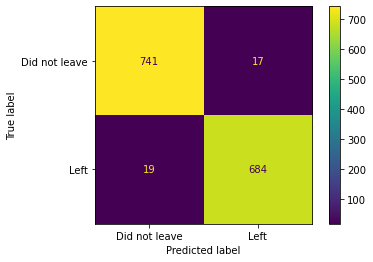

In [70]:
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(model, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not leave", "Left"])

In [45]:
from sklearn.metrics import accuracy_score
Catboost_Accuracy=accuracy_score(y_test, predictions)
print('Catboost accuracy score:',Catboost_Accuracy)

Catboost accuracy score: 0.9767282683093771


## Feature Importance

In [28]:
model.get_feature_importance(prettified=True)

Feature Id  Importances
0                total_intl_calls    22.973586
1   number_customer_service_calls    22.077127
2              international_plan     9.391547
3               total_day_minutes     8.372477
4                total_day_charge     6.931042
5               total_eve_minutes     4.155314
6                total_eve_charge     3.382403
7              total_intl_minutes     3.125236
8                 total_day_calls     2.730789
9                 total_eve_calls     2.405128
10              total_night_calls     2.332645
11            total_night_minutes     2.278617
12              total_intl_charge     2.156744
13                voice_mail_plan     1.970120
14          number_vmail_messages     1.961544
15                 account_length     1.916929
16             total_night_charge     1.838752

In [3]:
from catboost import CatBoostClassifier

## Saving the model

In [53]:

my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    #cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [54]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0


## Hyperparameter tunning

In [29]:
# Training Speed
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1)

fast_model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
# Accuracy
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    verbose=False,
    eval_set=(X_test, y_test),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Training the model after parameter tunning

In [32]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    #cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.020373
0:	learn: 0.6790140	total: 15.8ms	remaining: 19s
100:	learn: 0.2522722	total: 717ms	remaining: 7.8s
200:	learn: 0.1812110	total: 1.54s	remaining: 7.67s
300:	learn: 0.1453832	total: 2.28s	remaining: 6.81s
400:	learn: 0.1215789	total: 3.65s	remaining: 7.27s
500:	learn: 0.1030999	total: 5.33s	remaining: 7.44s
600:	learn: 0.0891756	total: 7s	remaining: 6.98s
700:	learn: 0.0790342	total: 8.39s	remaining: 5.97s
800:	learn: 0.0710794	total: 9.54s	remaining: 4.75s
900:	learn: 0.0643366	total: 10.4s	remaining: 3.46s
1000:	learn: 0.0584374	total: 11.2s	remaining: 2.22s
1100:	learn: 0.0534462	total: 11.8s	remaining: 1.06s
1199:	learn: 0.0489016	total: 12.5s	remaining: 0us


## Calculate predictions for the contest

In [40]:
pred=best_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
Catboost_Accuracy=accuracy_score(y_test,pred)
print('Catboost accuracy score:',Catboost_Accuracy)

Catboost accuracy score: 0.9897330595482546


In [41]:
print(confusion_matrix(y_test, pred))

[[756   2]
 [ 13 690]]


In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       758
           1       1.00      0.98      0.99       703

    accuracy                           0.99      1461
   macro avg       0.99      0.99      0.99      1461
weighted avg       0.99      0.99      0.99      1461



X_test = test_df.drop('id', axis=1)
test_pool = Pool(data=X_test, cat_features=cat_features)
contest_predictions = best_model.predict_proba(test_pool)
print('Predictoins:')
print(contest_predictions)

## Prepare the submission

f = open('submit.csv', 'w')
f.write('Id,Action\n')
for idx in range(len(contest_predictions)):
    line = str(test_df['id'][idx]) + ',' + str(contest_predictions[idx][1]) + '\n'
    f.write(line)
f.close()